In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr
import numpy as np

In [6]:
filepath = input("Enter user data filepath: ") #Expected 
                                               # C:\Users\Acer\Machine Learning Final Assignment\Project 4\
                                               # for this pc dir.
print()

Enter user data filepath: C:\Users\Acer\Machine Learning Final Assignment\Project 4\



In [7]:
df = pd.read_csv(filepath+'Sleep_Efficiency.csv')
df['Smoking status'] = df['Smoking status'].replace(to_replace=['Yes', 'No'], value=[1.0, 0.0]).astype('float64')
df['Gender'] = df['Gender'].replace(to_replace=['Male', 'Female'], value=[1.0, 0.0]).astype('float64')
df = df.drop(columns=['Bedtime','Wakeup time','ID'])
df

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,0.0,6.0,0.88,18,70,12,0.0,0.0,0.0,1.0,3.0
1,69,1.0,7.0,0.66,19,28,53,3.0,0.0,3.0,1.0,3.0
2,40,0.0,8.0,0.89,20,70,10,1.0,0.0,0.0,0.0,3.0
3,40,0.0,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,1.0
4,57,1.0,8.0,0.76,27,55,18,3.0,0.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,0.0,7.5,0.91,22,57,21,0.0,0.0,0.0,0.0,5.0
448,52,1.0,6.0,0.74,28,57,15,4.0,25.0,0.0,0.0,3.0
449,40,0.0,8.5,0.55,20,32,48,1.0,NaN,3.0,1.0,0.0
450,45,1.0,7.0,0.76,18,72,10,3.0,0.0,0.0,0.0,3.0


In [8]:
df.isnull().sum()

Age                        0
Gender                     0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [9]:
df["Awakenings"].fillna(0, inplace = True)
df["Caffeine consumption"].fillna(0, inplace = True)
df["Alcohol consumption"].fillna(0, inplace = True)
df["Exercise frequency"].fillna(0, inplace = True)
df.isnull().sum()

Age                       0
Gender                    0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

In [10]:
df.describe()

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,40.285398,0.504425,7.465708,0.788916,22.615044,52.823009,24.561947,1.568584,22.345133,1.137168,0.340708,1.767699
std,13.172250,0.500534,0.866625,0.135237,3.525963,15.654235,15.313665,1.368698,29.848626,1.608938,0.474472,1.433375
min,9.000000,0.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,7.000000,0.697500,20.000000,48.250000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,52.000000,1.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,1.000000,3.000000
max,69.000000,1.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,1.000000,5.000000


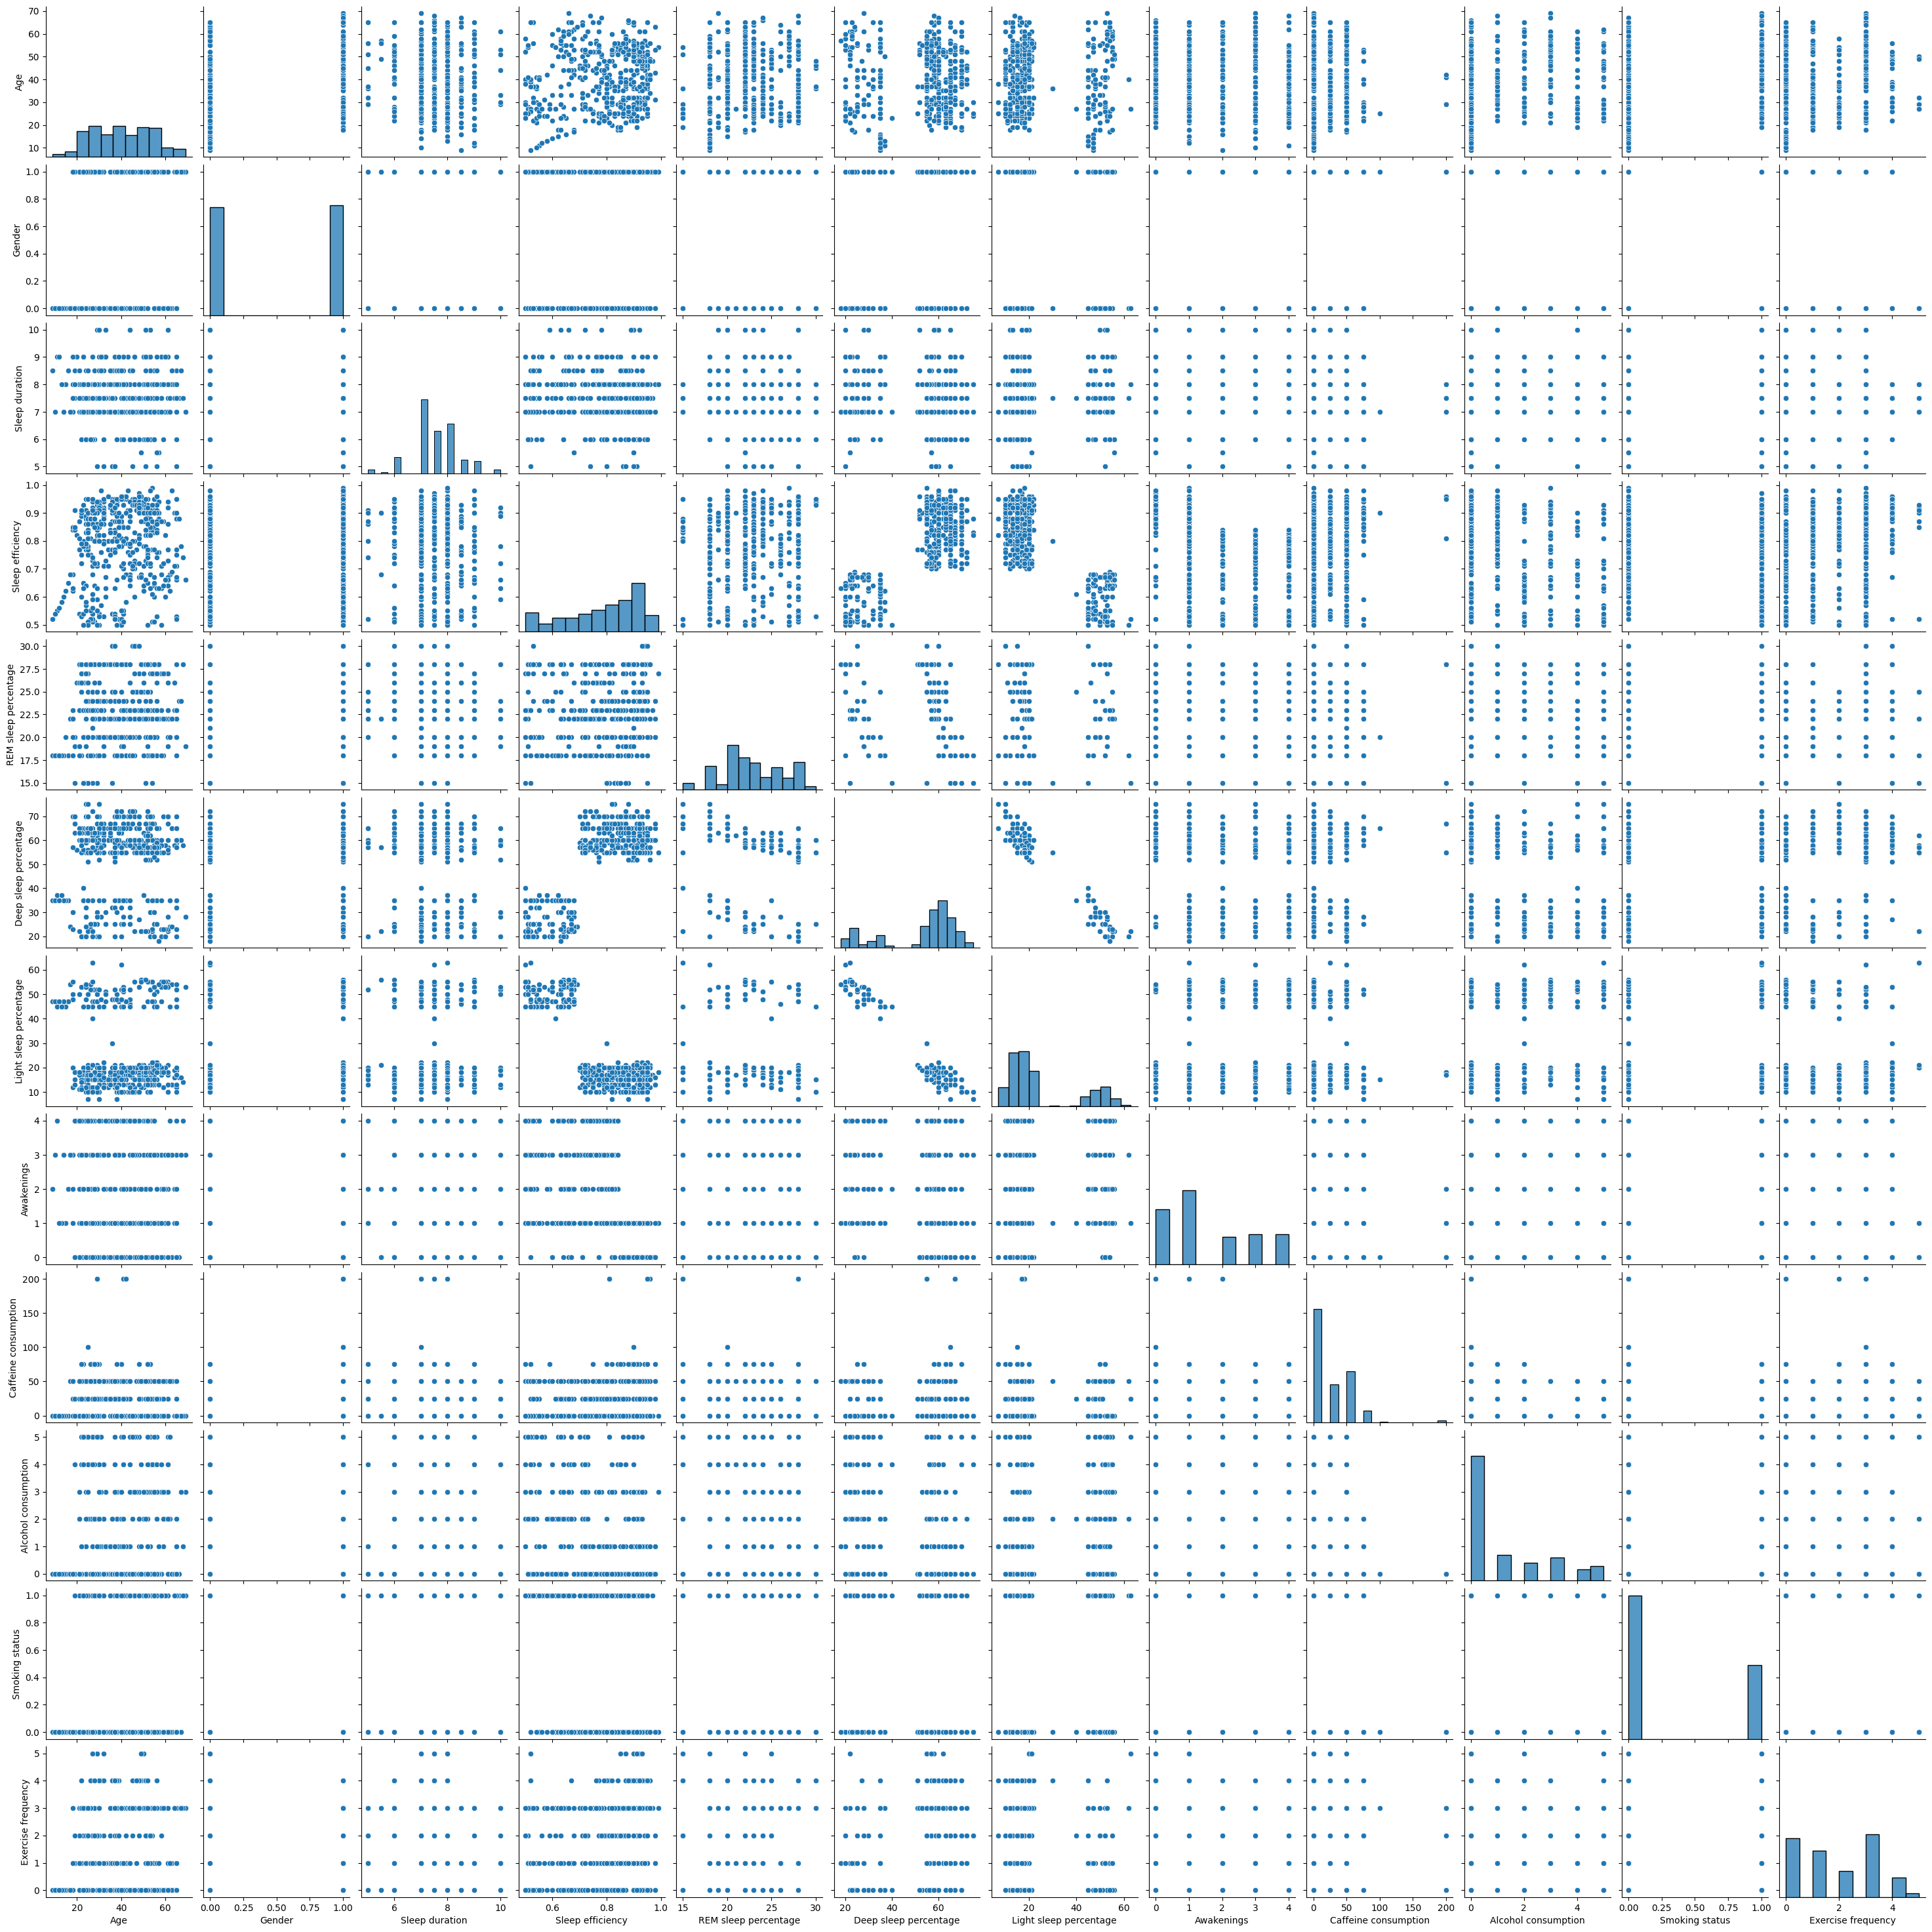

In [11]:
%matplotlib inline
sns.pairplot(df)

<Axes: >

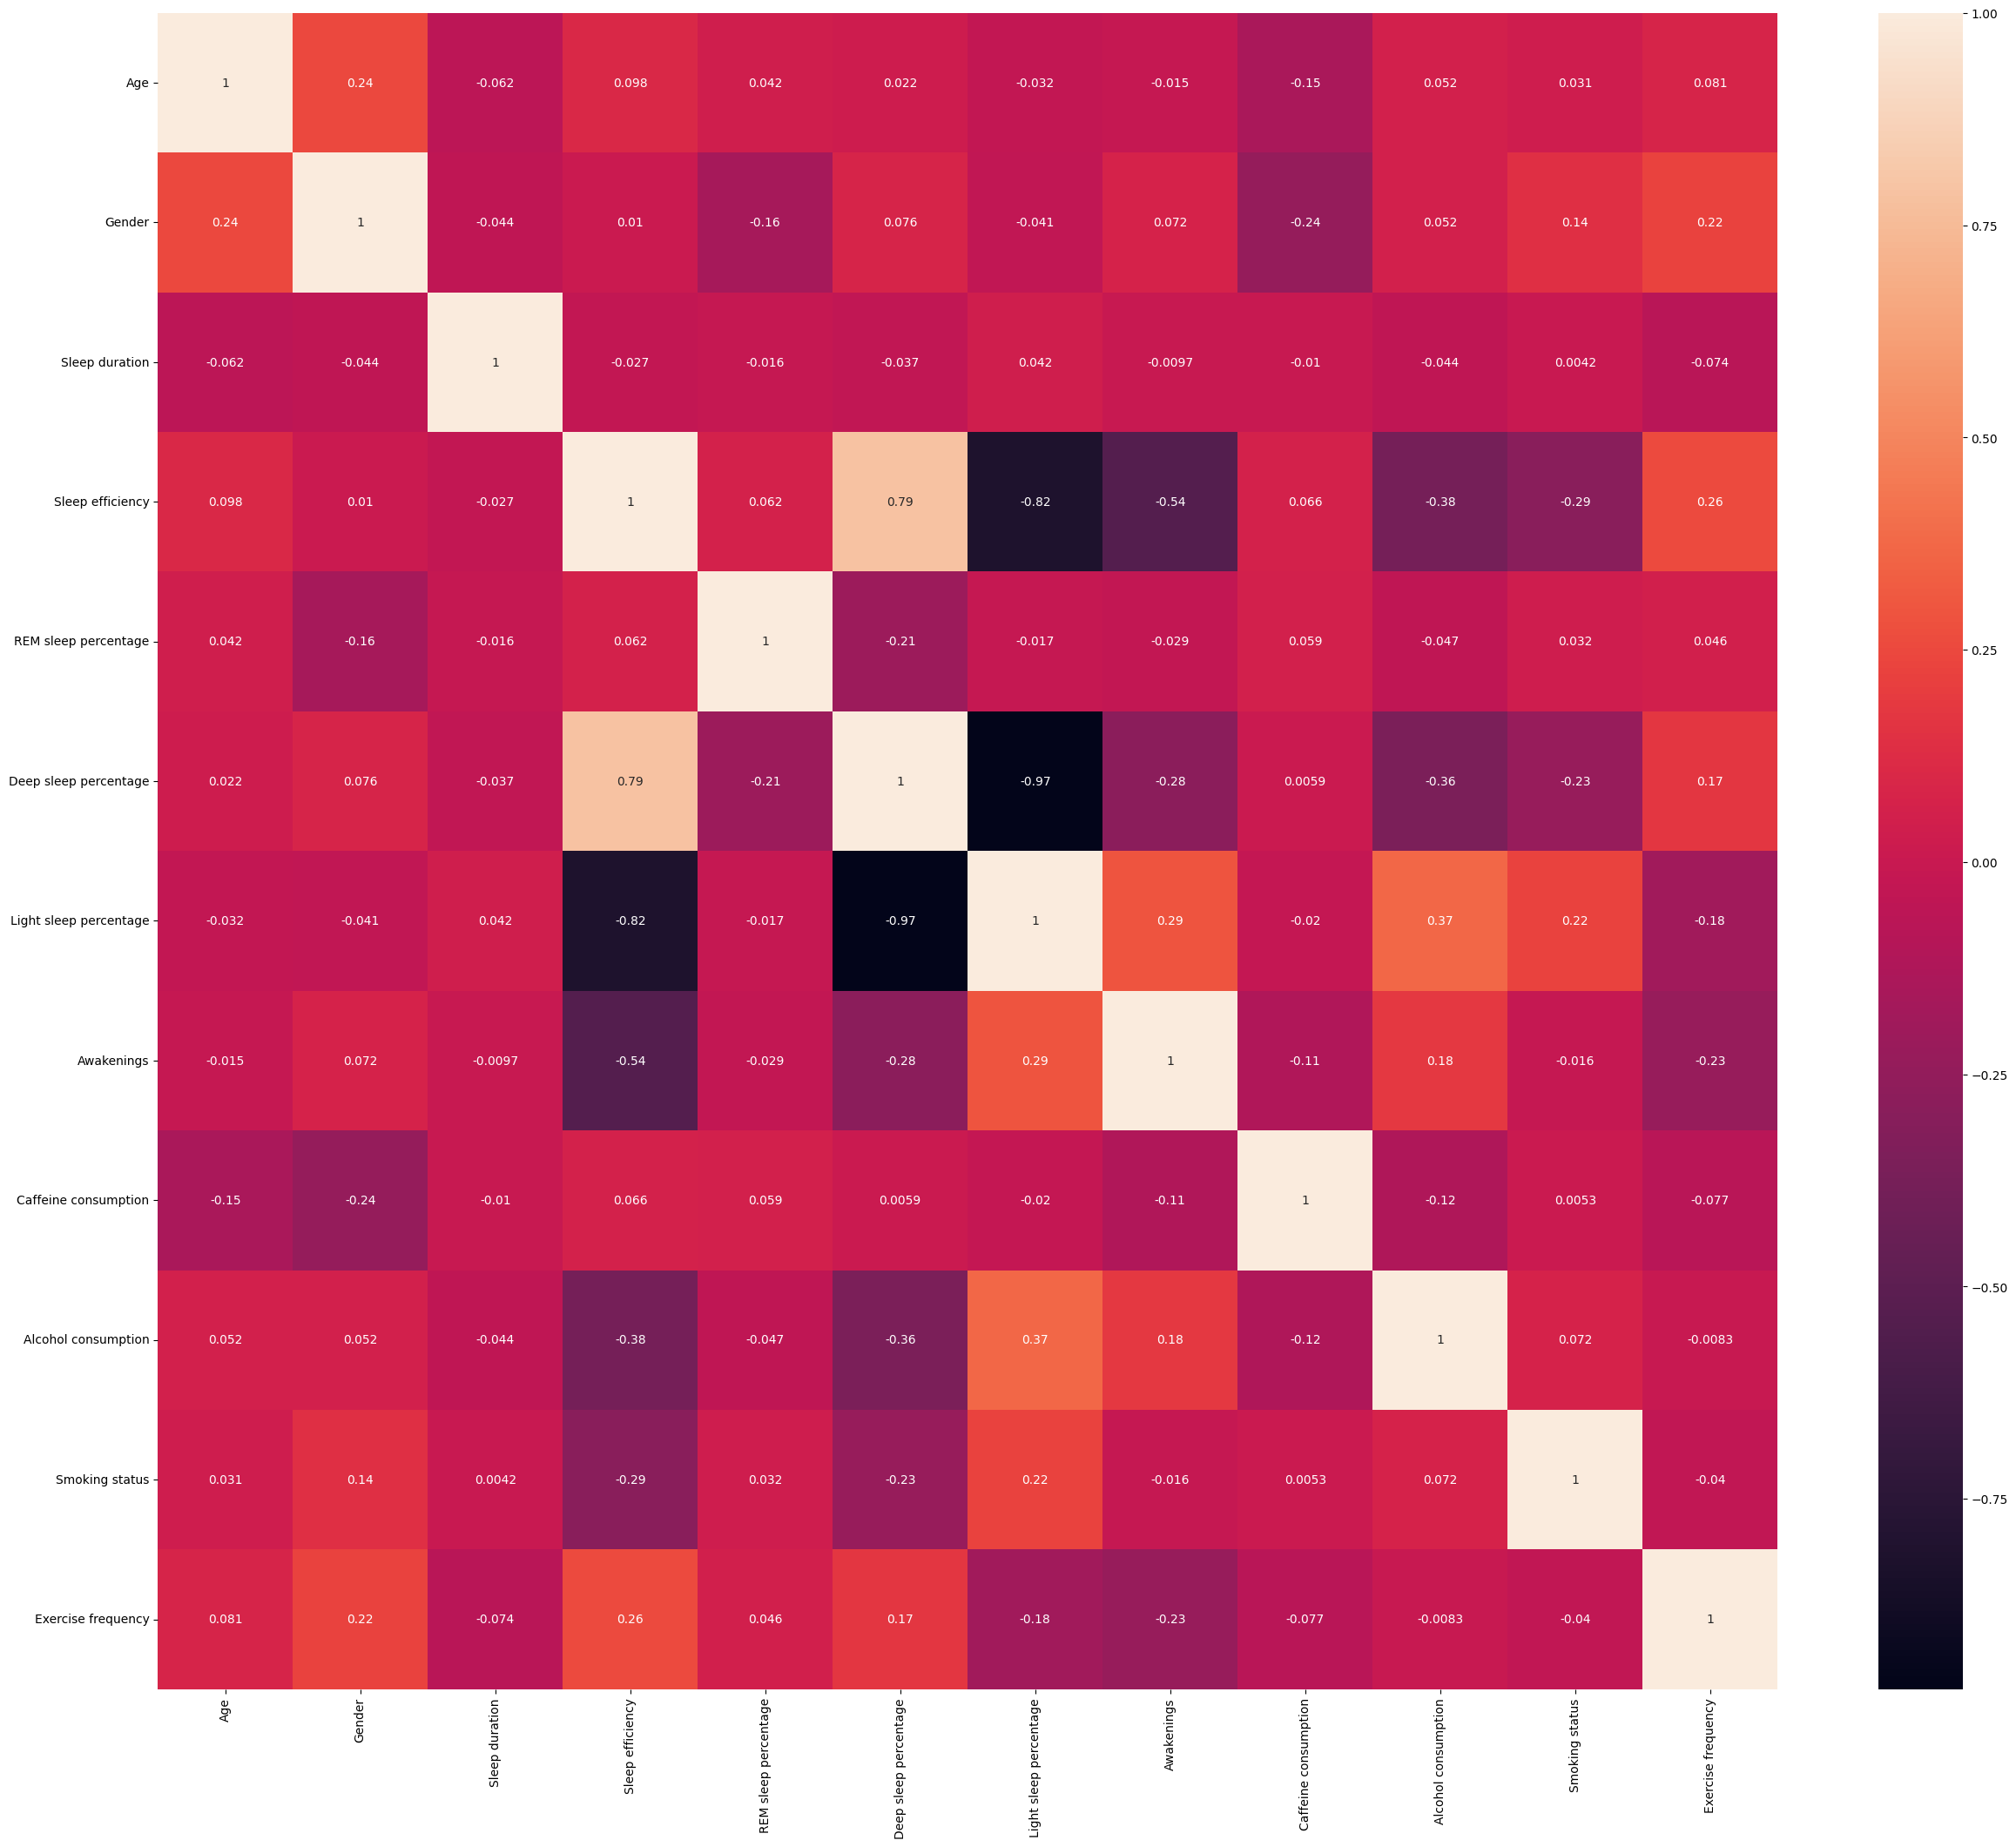

In [12]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(), annot=True)

In [13]:
#X = df.drop(columns=['Sleep duration','Sleep efficiency',
#                    'REM sleep percentage','Deep sleep percentage',
#                     'Light sleep percentage','Awakenings',
#                    'Bedtime','Wakeup time',
#                    'ID'])
outcome_columns = ['Sleep efficiency', 'Light sleep percentage', 'REM sleep percentage', 'Deep sleep percentage', 'Awakenings']

X = df.drop(outcome_columns, axis='columns')
y = df[outcome_columns]

In [14]:
X

,Age,Gender,Sleep duration,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,0.0,6.0,0.0,0.0,1.0,3.0
1,69,1.0,7.0,0.0,3.0,1.0,3.0
2,40,0.0,8.0,0.0,0.0,0.0,3.0
3,40,0.0,6.0,50.0,5.0,1.0,1.0
4,57,1.0,8.0,0.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...
447,27,0.0,7.5,0.0,0.0,0.0,5.0
448,52,1.0,6.0,25.0,0.0,0.0,3.0
449,40,0.0,8.5,0.0,3.0,1.0,0.0
450,45,1.0,7.0,0.0,0.0,0.0,3.0


In [15]:
y

,Sleep efficiency,Light sleep percentage,REM sleep percentage,Deep sleep percentage,Awakenings
0,0.88,12,18,70,0.0
1,0.66,53,19,28,3.0
2,0.89,10,20,70,1.0
3,0.51,52,23,25,3.0
4,0.76,18,27,55,3.0
...,...,...,...,...,...
447,0.91,21,22,57,0.0
448,0.74,15,28,57,4.0
449,0.55,48,20,32,1.0
450,0.76,10,18,72,3.0


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   452 non-null    int64  
 1   Gender                452 non-null    float64
 2   Sleep duration        452 non-null    float64
 3   Caffeine consumption  452 non-null    float64
 4   Alcohol consumption   452 non-null    float64
 5   Smoking status        452 non-null    float64
 6   Exercise frequency    452 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 24.8 KB


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [18]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [19]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from lightgbm import LGBMRegressor

In [20]:
print(y_train.columns)

Index(['Sleep efficiency', 'Light sleep percentage', 'REM sleep percentage',
       'Deep sleep percentage', 'Awakenings'],
      dtype='object')


In [21]:
measures = []
model_names = []
model_mean_mses = []
for outcome_column in outcome_columns:
    models = {
        'GB Regressor': GradientBoostingRegressor(),
        'RF Regressor': RandomForestRegressor(),
        'Linear Regression': LinearRegression(),
        'ElasticNet': ElasticNet(),
        'SGD Regressor': SGDRegressor(),
        'Bayesian Ridge': BayesianRidge(),
        'SVR': SVR(),
        'Kernel Ridge': KernelRidge(),
        'LightGBM' : LGBMRegressor()
    }
    print(outcome_column)
    y_outcome = y_train[outcome_column]
    
    for model_name, model in models.items():
        scores = cross_val_score(model, X_train, y_outcome, scoring='neg_mean_squared_error')
        measures.append(outcome_column)
        model_names.append(model_name)
        model_mean_mses.append(-scores.mean())
        
    print(f'Model mean MSE calculation completed for {outcome_column}')

Sleep efficiency
Model mean MSE calculation completed for Sleep efficiency
Light sleep percentage
Model mean MSE calculation completed for Light sleep percentage
REM sleep percentage
Model mean MSE calculation completed for REM sleep percentage
Deep sleep percentage
Model mean MSE calculation completed for Deep sleep percentage
Awakenings
Model mean MSE calculation completed for Awakenings


In [22]:
model_scores = pd.DataFrame()
model_scores['outcome measure'] = measures
model_scores['model'] = model_names
model_scores['mean mse'] = model_mean_mses
model_scores

,outcome measure,model,mean mse
0,Sleep efficiency,GB Regressor,0.012250
1,Sleep efficiency,RF Regressor,0.012023
2,Sleep efficiency,Linear Regression,0.013646
3,Sleep efficiency,ElasticNet,0.019178
4,Sleep efficiency,SGD Regressor,0.023074
5,Sleep efficiency,Bayesian Ridge,0.013620
6,Sleep efficiency,SVR,0.013561
7,Sleep efficiency,Kernel Ridge,0.044764
8,Sleep efficiency,LightGBM,0.012052
9,Light sleep percentage,GB Regressor,188.357199


In [23]:
chosen_models = {
    'Sleep efficiency': LGBMRegressor(),
    'Light sleep percentage': LGBMRegressor(),
    'REM sleep percentage': LGBMRegressor(),
    'Deep sleep percentage': LGBMRegressor(),
    'Awakenings': BayesianRidge()
}

In [24]:
observedOutput = []
mses = []
maes = []
correlations = []
p_values = []
for outcome_column in outcome_columns:
    model = chosen_models[outcome_column]
    model.fit(X_train, y_train[outcome_column])
    y_predicted = model.predict(X_test)
    mse = mean_squared_error(y_test[outcome_column], y_predicted)
    mae = mean_absolute_error(y_test[outcome_column], y_predicted)
    correlations_stats = spearmanr(y_test[outcome_column], y_predicted)
    observedOutput.append(outcome_column)
    mses.append(mse)
    maes.append(mae)
    correlations.append(correlations_stats.correlation)
    p_values.append(correlations_stats.pvalue)

In [43]:
outcome_scores = pd.DataFrame()
outcome_scores['output'] = observedOutput
outcome_scores['MSE'] = mses
outcome_scores['MAE'] = maes
outcome_scores['Correlation'] = correlations
outcome_scores['Correlation p-value'] = p_values
outcome_scores

,output,MSE,MAE,Correlation,Correlation p-value
0,Sleep efficiency,0.011902,0.085599,0.485999,1.999800e-09
1,Light sleep percentage,174.034617,9.620225,0.366071,1.171636e-05
2,REM sleep percentage,10.993636,2.650985,0.449850,3.922836e-08
3,Deep sleep percentage,196.859714,10.174073,0.318897,1.543880e-04
4,Awakenings,1.817161,1.092070,0.138531,1.077492e-01


In [54]:
feature_columns = ['Age','Gender','Sleep duration','Caffeine consumption','Alcohol consumption','Smoking status','Excercise frequency']
user_Age = np.float64(input("What is your age: "))
user_Gender = np.float64(input("Male - 1, Female - 0: "))
user_Sleep_duration = np.float64(input("How long is your sleep (in hours): "))
user_Caffeine_consumption = np.float64(input("Amount of caffeine consumed in the 24 hours (in mg): "))
user_Alcohol_consumption = np.float64(input("Amount of alcohol consumed in the 24 hours (in oz): "))
user_Smoking_status = np.float64(input("Smoker - 1, Non-Smoker - 0: "))
user_Exercise_frequency = np.float64(input("Number of times exercises this week: "))
user_X = pd.DataFrame({'Age':user_Age,'Gender':user_Gender,'Sleep duration':user_Sleep_duration,'Caffeine consumption':user_Caffeine_consumption,'Alcohol consumption':user_Alcohol_consumption,'Smoking status':user_Smoking_status,'Exercise frequency':user_Exercise_frequency},index=[0])

What is your age: 20
Male - 1, Female - 0: 1
How long is your sleep (in hours): 5
Amount of caffeine consumed in the 24 hours (in mg): 500
Amount of alcohol consumed in the 24 hours (in oz): 0
Smoker - 1, Non-Smoker - 0: 0
Number of times exercises this week: 14


In [55]:
user_X

,Age,Gender,Sleep duration,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,20.0,1.0,5.0,500.0,0.0,0.0,14.0


In [59]:
print("Sleep efficiency")
print("Light sleep percentage")
print("REM sleep percentage")
print("Deep sleep percentage")
print("Awakenings")
dataToSee = input("Which do you want to see: ")

Sleep efficiency
Light sleep percentage
REM sleep percentage
Deep sleep percentage
Awakenings
Which do you want to see: Deep sleep percentage


In [60]:
model = LGBMRegressor()
model.fit(X_train,y_train[dataToSee])

LGBMRegressor()

In [61]:
user_X = scaler.fit_transform(user_X)
user_predict = model.predict(user_X)
user_predict

array([39.85337208])